In [1]:
import pandas as pd
import numpy as np

pd.set_option('display.max_rows', 500)

![CRISP_DM](figures/CRISP_DM.png)

# Data Understanding

We would like to track Corona VIRUS spread across countries and with personal local info


# GITHUB CSV DATA

git clone/pull:https://github.com/CSSEGISandData/COVID-19

In [3]:
data_path='eps_covid_19/data/raw/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'

pd_raw=pd.read_csv(data_path)

In [4]:
pd_raw.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/17/22,5/18/22,5/19/22,5/20/22,5/21/22,5/22/22,5/23/22,5/24/22,5/25/22,5/26/22
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,179328,179477,179597,179624,179674,179716,179716,179771,179835,179835
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,275688,275732,275732,275732,275838,275864,275881,275939,275985,276012
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,265828,265834,265841,265847,265851,265854,265855,265860,265862,265864
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,42156,42572,42572,42572,42572,42572,42572,42572,42894,42894
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,99287,99287,99287,99287,99287,99287,99287,99433,99527,99527


In [5]:
pd_raw.columns[4:]

Index(['1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       '1/28/20', '1/29/20', '1/30/20', '1/31/20',
       ...
       '5/17/22', '5/18/22', '5/19/22', '5/20/22', '5/21/22', '5/22/22',
       '5/23/22', '5/24/22', '5/25/22', '5/26/22'],
      dtype='object', length=856)

In [6]:
time_idx=pd_raw.columns[4:]

In [7]:
df_plot=pd.DataFrame({
    'date':time_idx})
df_plot.head()

,date
0,1/22/20
1,1/23/20
2,1/24/20
3,1/25/20
4,1/26/20


In [8]:
pd_raw['Country/Region'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antarctica', 'Antigua and Barbuda', 'Argentina', 'Armenia',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana',
       'Brazil', 'Brunei', 'Bulgaria', 'Burkina Faso', 'Burma', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark',
       'Diamond Princess', 'Djibouti', 'Dominica', 'Dominican Republic',
       'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea',
       'Estonia', 'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France',
       'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece',
       'Grenada', 'Gua

In [9]:
pd_raw[pd_raw['Country/Region']=='US'].iloc[:,4::].sum(axis=0)

1/22/20           1
1/23/20           1
1/24/20           2
1/25/20           2
1/26/20           5
             ...   
5/22/22    83282408
5/23/22    83390587
5/24/22    83501457
5/25/22    83718160
5/26/22    83837114
Length: 856, dtype: int64

In [10]:
country_list=['Italy',
             'US',
             'Spain',
             'Germany',
             'Afghanistan',
             ]

In [11]:
for each in country_list:
    df_plot[each]=np.array(pd_raw[pd_raw['Country/Region']==each].iloc[:,4::].sum(axis=0))
    

<AxesSubplot:xlabel='date'>

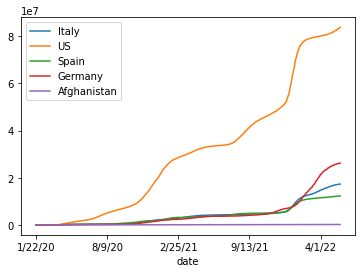

In [12]:
%matplotlib inline
df_plot.set_index('date').plot()

# DATA TYPE DATE

In [13]:
from datetime import datetime   #using the datetime  library

In [14]:
type(df_plot.date[0])

str

In [15]:
df_plot.head()

,date,Italy,US,Spain,Germany,Afghanistan
0,1/22/20,0,1,0,0,0
1,1/23/20,0,1,0,0,0
2,1/24/20,0,2,0,0,0
3,1/25/20,0,2,0,0,0
4,1/26/20,0,5,0,0,0


In [16]:
datetime.strptime(df_plot.date[0],"%m/%d/%y")            #function "strptime" converts a string to date object(as the type is str type)

datetime.datetime(2020, 1, 22, 0, 0)

In [17]:
time_index=[datetime.strptime(each,"%m/%d/%y") for each in df_plot.date ] #converting to a datetime.. a vector "time_index" of datetime objects

In [18]:
time_index[0:5]

[datetime.datetime(2020, 1, 22, 0, 0),
 datetime.datetime(2020, 1, 23, 0, 0),
 datetime.datetime(2020, 1, 24, 0, 0),
 datetime.datetime(2020, 1, 25, 0, 0),
 datetime.datetime(2020, 1, 26, 0, 0)]

In [19]:
time_string=[each.strftime('%Y-%m-%d') for each in time_index] #converting back to str(function is "each.strftime")

In [20]:
time_string[0:5]

['2020-01-22', '2020-01-23', '2020-01-24', '2020-01-25', '2020-01-26']

This string vector norm can be used for title, text etc. This can be used by other tools like excel powervi etc

In [21]:
df_plot['date']=time_index  #pusing the vector to a 'date' column
type(df_plot['date'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [22]:
df_plot.head()

,date,Italy,US,Spain,Germany,Afghanistan
0,2020-01-22,0,1,0,0,0
1,2020-01-23,0,1,0,0,0
2,2020-01-24,0,2,0,0,0
3,2020-01-25,0,2,0,0,0
4,2020-01-26,0,5,0,0,0


In [23]:
df_plot.to_csv('eps_covid_19/data/processed/covid_small_table.csv',sep=';',index=False)

# Relational data model-defining a primary key

A primary key's main feature are:
1.It  ust contain a unique valuefor each row of data
2.It cant contain null values

In [24]:
data_path='eps_covid_19/data/raw/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'

pd_raw=pd.read_csv(data_path)
pd_raw.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/17/22,5/18/22,5/19/22,5/20/22,5/21/22,5/22/22,5/23/22,5/24/22,5/25/22,5/26/22
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,179328,179477,179597,179624,179674,179716,179716,179771,179835,179835
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,275688,275732,275732,275732,275838,275864,275881,275939,275985,276012
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,265828,265834,265841,265847,265851,265854,265855,265860,265862,265864
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,42156,42572,42572,42572,42572,42572,42572,42572,42894,42894
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,99287,99287,99287,99287,99287,99287,99287,99433,99527,99527


In [25]:
#Doing some name changes
pd_data_mod=pd_raw

In [26]:
#we have to remove 'Lat' and 'Long' colums from the data set since it wont change wrt time
pd_data_mod=pd_data_mod.drop(['Lat','Long'],axis=1)
pd_data_mod.head()

,Province/State,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,5/17/22,5/18/22,5/19/22,5/20/22,5/21/22,5/22/22,5/23/22,5/24/22,5/25/22,5/26/22
0,NaN,Afghanistan,0,0,0,0,0,0,0,0,...,179328,179477,179597,179624,179674,179716,179716,179771,179835,179835
1,NaN,Albania,0,0,0,0,0,0,0,0,...,275688,275732,275732,275732,275838,275864,275881,275939,275985,276012
2,NaN,Algeria,0,0,0,0,0,0,0,0,...,265828,265834,265841,265847,265851,265854,265855,265860,265862,265864
3,NaN,Andorra,0,0,0,0,0,0,0,0,...,42156,42572,42572,42572,42572,42572,42572,42572,42894,42894
4,NaN,Angola,0,0,0,0,0,0,0,0,...,99287,99287,99287,99287,99287,99287,99287,99433,99527,99527


In [27]:
#Creating an index of state and countries and dates and transposing it with '.T'
test_pd=pd_data_mod.set_index(['Province/State','Country/Region']).T

In [28]:
test_pd.columns #multi index- 2 dimensional index columns giving state and country

MultiIndex([(                           nan,          'Afghanistan'),
            (                           nan,              'Albania'),
            (                           nan,              'Algeria'),
            (                           nan,              'Andorra'),
            (                           nan,               'Angola'),
            (                           nan,           'Antarctica'),
            (                           nan,  'Antigua and Barbuda'),
            (                           nan,            'Argentina'),
            (                           nan,              'Armenia'),
            ('Australian Capital Territory',            'Australia'),
            ...
            (                           nan,              'Uruguay'),
            (                           nan,           'Uzbekistan'),
            (                           nan,              'Vanuatu'),
            (                           nan,            'Venezuela'),
    

In [29]:
#command to stack the multi columns to row perspective(coulmns to rows like in pivotin a tble in excel
test_pd.stack(level=0)

Country/Region             Afghanistan  Albania  Algeria  Andorra  Angola  \
        Province/State                                                      
1/22/20 NaN                        0.0      0.0      0.0      0.0     0.0   
        Alberta                    NaN      NaN      NaN      NaN     NaN   
        Anguilla                   NaN      NaN      NaN      NaN     NaN   
        Anhui                      NaN      NaN      NaN      NaN     NaN   
        Aruba                      NaN      NaN      NaN      NaN     NaN   
...                                ...      ...      ...      ...     ...   
5/26/22 Western Australia          NaN      NaN      NaN      NaN     NaN   
        Xinjiang                   NaN      NaN      NaN      NaN     NaN   
        Yukon                      NaN      NaN      NaN      NaN     NaN   
        Yunnan                     NaN      NaN      NaN      NaN     NaN   
        Zhejiang                   NaN      NaN      NaN      NaN     NaN   

Country/Region             Antarctica  Antigua and Barbuda  Argentina  \
        Province/State                                                  
1/22/20 NaN                       0.0                  0.0        0.0   
        Alberta                   NaN                  NaN        NaN   
        Anguilla                  NaN                  NaN        NaN   
        Anhui                     NaN                  NaN        NaN   
        Aruba                     NaN                  NaN        NaN   
...                               ...                  ...        ...   
5/26/22 Western Australia         NaN                  NaN        NaN   
        Xinjiang                  NaN                  NaN        NaN   
        Yukon                     NaN                  NaN        NaN   
        Yunnan                    NaN                  NaN        NaN   
        Zhejiang                  NaN                  NaN        NaN   

Country/Region             Armenia  Australia  ...  Uruguay  Uzbekistan  \
        Province/State                         ...                        
1/22/20 NaN                    0.0        NaN  ...      0.0         0.0   
        Alberta                NaN        NaN  ...      NaN         NaN   
        Anguilla               NaN        NaN  ...      NaN         NaN   
        Anhui                  NaN        NaN  ...      NaN         NaN   
        Aruba                  NaN        NaN  ...      NaN         NaN   
...                            ...        ...  ...      ...         ...   
5/26/22 Western Australia      NaN   705723.0  ...      NaN         NaN   
        Xinjiang               NaN        NaN  ...      NaN         NaN   
        Yukon                  NaN        NaN  ...      NaN         NaN   
        Yunnan                 NaN        NaN  ...      NaN         NaN   
        Zhejiang               NaN        NaN  ...      NaN         NaN   

Country/Region             Vanuatu  Venezuela  Vietnam  West Bank and Gaza  \
        Province/State                                                       
1/22/20 NaN                    0.0        0.0      0.0                 0.0   
        Alberta                NaN        NaN      NaN                 NaN   
        Anguilla               NaN        NaN      NaN                 NaN   
        Anhui                  NaN        NaN      NaN                 NaN   
        Aruba                  NaN        NaN      NaN                 NaN   
...                            ...        ...      ...                 ...   
5/26/22 Western Australia      NaN        NaN      NaN                 NaN   
        Xinjiang               NaN        NaN      NaN                 NaN   
        Yukon                  NaN        NaN      NaN                 NaN   
        Yunnan                 NaN        NaN      NaN                 NaN   
        Zhejiang               NaN        NaN      NaN                 NaN   

Country/Region             Winter Olympics 2022  Yemen  Z

In [30]:
pd_relational_model=test_pd.stack(level=[0,1]).reset_index() # both columns done in rows dimensions
pd_relational_model_v1=pd_relational_model.rename(columns={'level_0':'date',0:'confirmed'})
pd_relational_model_v1.head()

,date,Province/State,Country/Region,confirmed
0,1/22/20,NaN,Afghanistan,0.0
1,1/22/20,NaN,Albania,0.0
2,1/22/20,NaN,Algeria,0.0
3,1/22/20,NaN,Andorra,0.0
4,1/22/20,NaN,Angola,0.0


In [31]:
 pd_relational_model_v1.dtypes


date               object
Province/State     object
Country/Region     object
confirmed         float64
dtype: object

The type of date is still a 'str object'.. It should be converted to datetime object

In [32]:
#using "astype" conversion for this
pd_relational_model_v1['date']=pd_relational_model_v1.date.astype('datetime64[ns]')

In [33]:
pd_relational_model_v1.dtypes

date              datetime64[ns]
Province/State            object
Country/Region            object
confirmed                float64
dtype: object

In [34]:
df_plot.to_csv('eps_covid_19/data/processed/covid_relationalcases-confirmed.csv',sep=';')